In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic = titanic.drop(columns=["PassengerId", 'Name', 'Ticket', 'Cabin', 'Embarked'])
cols = list(titanic.columns.values)
cols = cols[1:len(cols)] + cols[:1]
titanic = titanic[cols]
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [4]:
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


<class 'pandas.core.series.Series'>


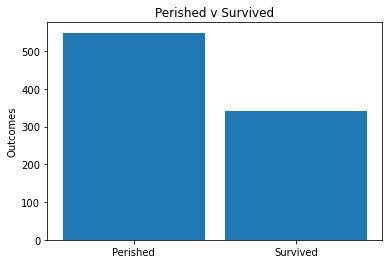

In [18]:
counts = titanic['Survived'].value_counts()
outcomes = (titanic['Survived'])
#width between bars
w = 0.35  
print(type(counts))
plt.bar(x=[0,.4], height=counts, width = w)
plt.xticks([0,.4], ("Perished", 'Survived'))

plt.ylabel('Outcomes')
plt.title('Perished v Survived')

plt.show()

In [10]:
cols = (titanic.columns.values)
total_passengers_mean = titanic[cols[:-1]].mean()
total_passengers_mean

Pclass     2.308642
Sex        0.647587
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64

In [7]:
groups = titanic.groupby("Survived")
survived = groups.get_group(1)
perished = groups.get_group(0)
cols = (perished.columns.values)
perished_cols_mean = perished[cols[:-1]].mean()
print("Perished")
print(perished_cols_mean)
print()
cols = (survived.columns.values)
survived_cols_mean = survived[cols[:-1]].mean()
print("Survived")
print(survived_cols_mean)

Perished
Pclass     2.531876
Sex        0.852459
Age       30.626179
SibSp      0.553734
Parch      0.329690
Fare      22.117887
dtype: float64

Survived
Pclass     1.950292
Sex        0.318713
Age       28.343690
SibSp      0.473684
Parch      0.464912
Fare      48.395408
dtype: float64


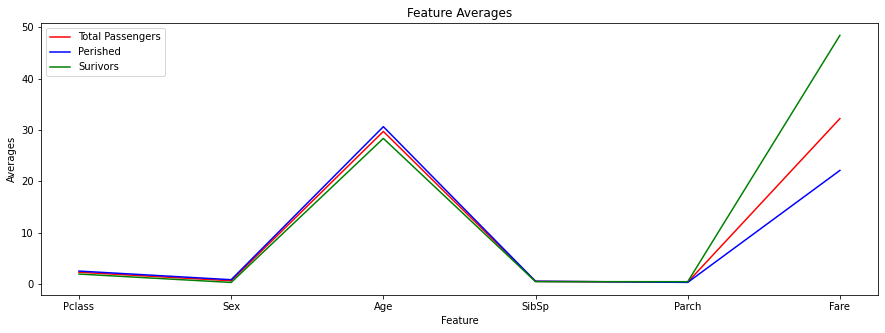

In [8]:
#Visualize data
#figsize is width, height
plt.figure(figsize=(15,5))
#plot (x, y)
#line plot
plt.plot(total_passengers_mean,'r',label="Total Passengers")
plt.plot(perished_cols_mean,'b',label="Perished")
plt.plot(survived_cols_mean,'g',label="Surivors")
plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Averages")
plt.legend()
plt.show()

Text(0.5, 0.98, 'Feature Averages - A Closer Look')

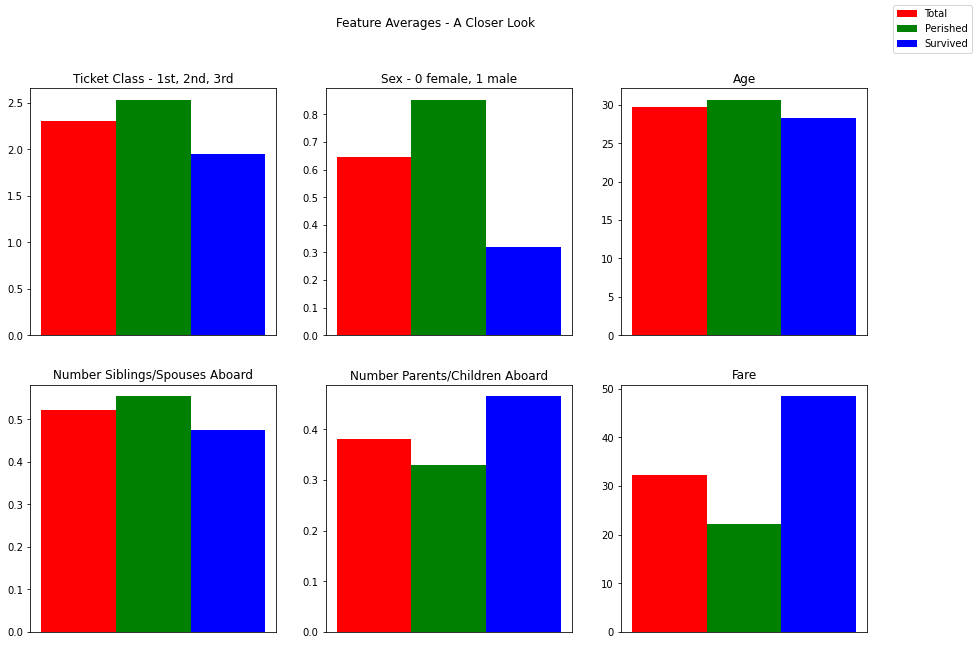

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
names = ['Ticket Class - 1st, 2nd, 3rd', 'Sex - 0 female, 1 male', 'Age', 'Number Siblings/Spouses Aboard', 'Number Parents/Children Aboard', 'Fare']
titles = ['Total', 'Perished', 'Survived']

ax[0, 0].bar(x=0, height=total_passengers_mean[0], width=.5, color='red', label='Total')
ax[0, 0].bar(x=.5, height=perished_cols_mean[0], width=.5, color='green', label='Perished')
ax[0, 0].bar(x=1, height=survived_cols_mean[0], width=.5, color='blue', label='Survived')
ax[0, 0].axes.xaxis.set_visible(False)
ax[0, 0].set_title(names[0])
for x in range(1,6):
    temp = [total_passengers_mean[x], perished_cols_mean[x], survived_cols_mean[x]]
    if x < 3:
        ax[0, x].bar(x=[0,.5,1], height=temp, width=.5, color=['red', 'green', 'blue'])
        ax[0, x].axes.xaxis.set_visible(False)
        ax[0, x].set_title(names[x])
    else:
        ax[1, x%3].bar(x=[0,.5,1], height=temp, width = .5, color=['red', 'green', 'blue'])
        ax[1, x%3].axes.xaxis.set_visible(False)
        ax[1, x%3].set_title(names[x])
        
fig.legend()
fig.suptitle("Feature Averages - A Closer Look")


In [69]:
titanic.corr()['Survived']

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

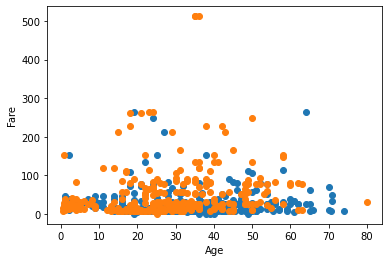

In [9]:
age_perished = perished["Age"]
fare_perished = perished["Fare"]

age_survived = survived["Age"]
fare_survived = survived["Fare"]

plt.scatter(age_perished, fare_perished)
plt.scatter(age_survived, fare_survived)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()